In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!ls

dataset.zip  sample_data


In [52]:
!unzip test.zip

Archive:  test.zip
   creating: test/
   creating: test/jet/
  inflating: test/jet/1-Northrop-Grumman-B-2-Spirit.jpg  
  inflating: test/jet/1123_World_Gordon_Middle_East-1898x700.jpeg  
  inflating: test/jet/1286px-YF-16_and_YF-17_in_flight.jpg  
  inflating: test/jet/153191.jpg     
  inflating: test/jet/1655041966-9971.jpg  
  inflating: test/jet/180213140221-f-35-tease-0213.jpg  
  inflating: test/jet/20220312_BLP502.jpg  
  inflating: test/jet/230614162129-f-22-raptor-230407-file.jpg  
  inflating: test/jet/230921-f-35-mn-0850-92f318.jpg  
  inflating: test/jet/33AY7WR-highres.jpg  
  inflating: test/jet/6th-gen-fighter-01-1.jpg  
  inflating: test/jet/7090672.jpg    
  inflating: test/jet/731619-773926-756x425.jpg  
  inflating: test/jet/7564faaa7a8316de91aeb05beba0cf3e.jpg  
  inflating: test/jet/800px-F-16_June_2008.jpg  
  inflating: test/jet/951fc94d-5bb9-4ff7-8047-14eaf79a379c_w408_r1_s.jpg  
  inflating: test/jet/AF-1-IMAGE-2.jpg  
  inflating: test/jet/Air-Force-Skyborg-Se

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/jet/
  inflating: dataset/jet/images100.jpg  
  inflating: dataset/jet/images101.jpg  
  inflating: dataset/jet/images102.jpg  
  inflating: dataset/jet/images103.jpg  
  inflating: dataset/jet/images104.jpg  
  inflating: dataset/jet/images105.jpg  
  inflating: dataset/jet/images106.jpg  
  inflating: dataset/jet/images107.jpg  
  inflating: dataset/jet/images108.jpg  
  inflating: dataset/jet/images109.jpg  
  inflating: dataset/jet/images110.jpg  
  inflating: dataset/jet/images111.jpg  
  inflating: dataset/jet/images112.jpg  
  inflating: dataset/jet/images113.jpg  
  inflating: dataset/jet/images114.jpg  
  inflating: dataset/jet/images115.jpg  
  inflating: dataset/jet/images116.jpg  
  inflating: dataset/jet/images117.jpg  
  inflating: dataset/jet/images118.jpg  
  inflating: dataset/jet/images119.jpg  
  inflating: dataset/jet/images120.jpg  
  inflating: dataset/jet/images121.jpg  
  inflating: dataset/jet/ima

In [ ]:
pip install tensorflow numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

import os

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2560 images belonging to 4 classes.
Found 640 images belonging to 4 classes.


In [ ]:
def build_lenet5(input_shape):
    model = models.Sequential()

    # Layer 1: Convolutional Layer
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Layer 2: Convolutional Layer
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the feature maps
    model.add(layers.Flatten())

    # Layer 3: Fully Connected Layer
    model.add(layers.Dense(120, activation='relu'))

    # Layer 4: Fully Connected Layer
    model.add(layers.Dense(84, activation='relu'))

    # Output layer
    model.add(layers.Dense(4, activation='softmax'))  # Assuming 10 output classes for classification

    return model

input_shape = (150, 150, 3)  # Assuming input image size of 28x28 pixels with 1 channel (grayscale)
model = build_lenet5(input_shape)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30,
    validation_data=validation_generator
)


Epoch 1/30
80/80 [==============================] - 31s 320ms/step - loss: 1.1334 - accuracy: 0.4512 - val_loss: 1.0319 - val_accuracy: 0.5766
Epoch 2/30
80/80 [==============================] - 20s 253ms/step - loss: 1.0287 - accuracy: 0.5547 - val_loss: 0.9599 - val_accuracy: 0.6234
Epoch 3/30
80/80 [==============================] - 21s 257ms/step - loss: 0.9369 - accuracy: 0.6242 - val_loss: 0.9658 - val_accuracy: 0.6094
Epoch 4/30
80/80 [==============================] - 22s 272ms/step - loss: 0.8950 - accuracy: 0.6316 - val_loss: 0.9279 - val_accuracy: 0.6375
Epoch 5/30
80/80 [==============================] - 21s 263ms/step - loss: 0.8756 - accuracy: 0.6469 - val_loss: 0.9377 - val_accuracy: 0.6109
Epoch 6/30
80/80 [==============================] - 25s 318ms/step - loss: 0.8376 - accuracy: 0.6641 - val_loss: 0.9515 - val_accuracy: 0.6078
Epoch 7/30
80/80 [==============================] - 20s 257ms/step - loss: 0.7739 - accuracy: 0.6961 - val_loss: 0.8390 - val_accuracy: 0.6687

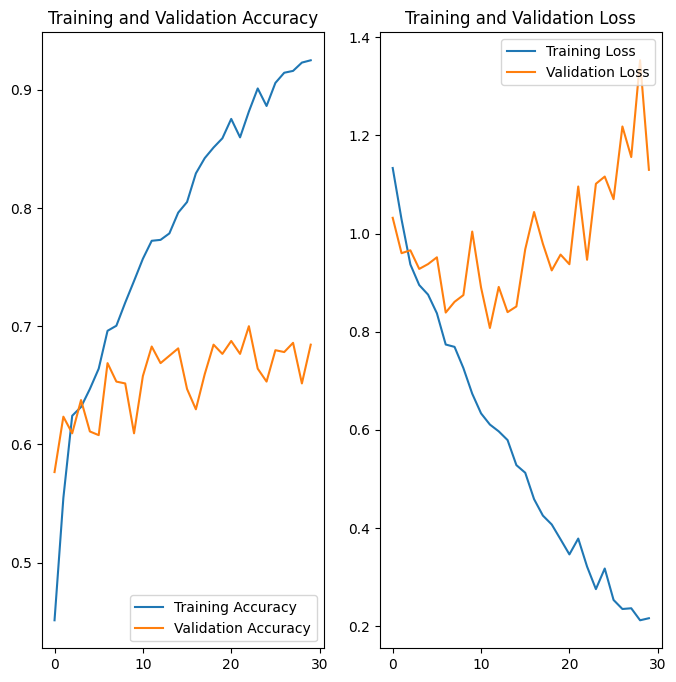

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save('vehicle_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2


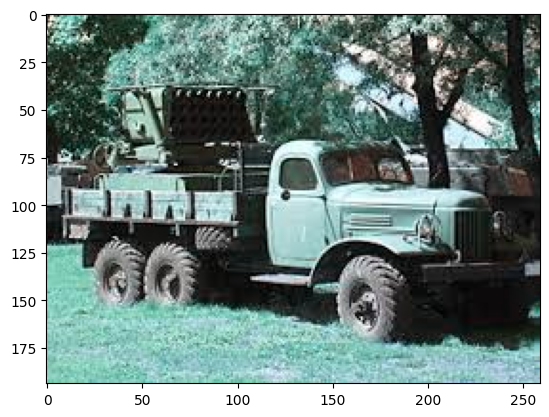

In [46]:
img=cv2.imread('car.jpg')
plt.imshow(img)
plt.show()

In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'car.png'
img = image.load_img(img_path, target_size=(150, 150))

In [48]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = img_array / 255.0  # Normalize the image (if it was normalized during training)

In [49]:
from tensorflow.keras.models import load_model

model = load_model('vehicle_classifier_model.h5')


In [50]:
predictions = model.predict(img_array)


1/1 [==============================] - 0s 112ms/step


In [51]:
# Assuming your classes are in alphabetical order
class_labels = ['jet', 'ship', 'tank', 'truck']

predicted_class = class_labels[np.argmax(predictions)]
print(f'The model predicts this image is a {predicted_class}')


The model predicts this image is a truck


In [55]:
# Define the image data generator with rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the test data generator
test_generator = test_datagen.flow_from_directory(
    'test/',
    target_size=(150, 150),  # Adjust the target size based on your model's input size
    color_mode='rgb',  # Change this to 'rgb' if your images are in color
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    # Add the following line to ignore corrupted images
    # This will skip images that cause errors during loading
    # The generator will continue processing the rest of the data
    # You might want to investigate the cause of the corrupted images
    # and fix them if possible
    subset='training'
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 660 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/21 [========================>.....] - ETA: 0s - loss: 1.0910 - accuracy: 0.7344

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  OSError: image file is truncated (8 bytes not processed)
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 479, in load_img
    img = img.resize(width_height_tuple, resample)

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 2156, in resize
    self.load()

  File "/usr/local/lib/python3.10/dist-packages/PIL/ImageFile.py", line 266, in load
    raise OSError(msg)

OSError: image file is truncated (8 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_4]]
  (1) UNKNOWN:  OSError: image file is truncated (8 bytes not processed)
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 479, in load_img
    img = img.resize(width_height_tuple, resample)

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 2156, in resize
    self.load()

  File "/usr/local/lib/python3.10/dist-packages/PIL/ImageFile.py", line 266, in load
    raise OSError(msg)

OSError: image file is truncated (8 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_17582]